In [1]:
import torch
from dataset import SatelliteDataset
from augmentations import apply_augmentations, AUGMENT_FNS
from torch.utils.data import DataLoader
from datautils import unprocess, create_img_from_classes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds = SatelliteDataset("../../data/grid_dir/train")
loader = DataLoader(ds, 2)

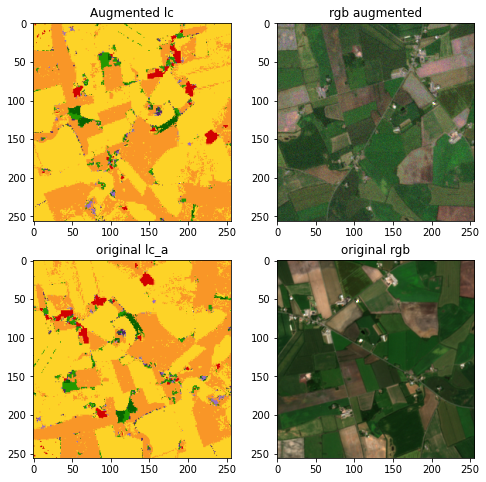

In [9]:
# cannot use color since it changes the image pixels to be from 0 to 1 to -1 to 1
for rgb_a, rgb_ab, lc_a, lc_b, binary_mask, lc_ab, masked_areas in loader:
    
    rgb_aug, lc_aug = apply_augmentations(rgb_a, lc_a, types=['blit', 'noise'],prob=1)
  
    rgb_aug = unprocess(rgb_aug.cpu().detach())
    lc_aug = unprocess(lc_aug.cpu().detach())
    rgb_a = unprocess(rgb_a.cpu().detach())
    lc_a = unprocess(lc_a.cpu().detach())
    
    lc_aug = create_img_from_classes(lc_aug)
    lc_a = create_img_from_classes(lc_a)
    
    fig, ax = plt.subplots(2,2, figsize=(8,8))
    ax[0,0].imshow(lc_aug)
    ax[0,0].set_title("Augmented lc")
    ax[0,1].imshow(rgb_aug)
    ax[0,1].set_title("rgb augmented")
    
    ax[1,0].imshow(lc_a)
    ax[1,0].set_title("original lc_a")
    ax[1,1].imshow(rgb_a)
    ax[1,1].set_title("original rgb")
    
    break

In [ ]:
n = AUGMENT_FNS["color"]

In [ ]:
len(n)

In [ ]:
a,b,c = n

In [ ]:
rgb = np.array(rgb,dtype=np.float32)

In [ ]:
np.min(rgb)